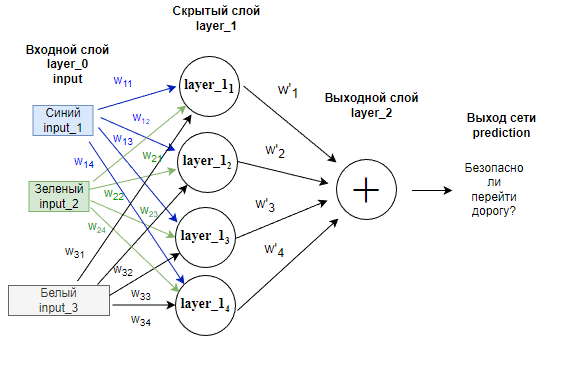

Введем обозначения:

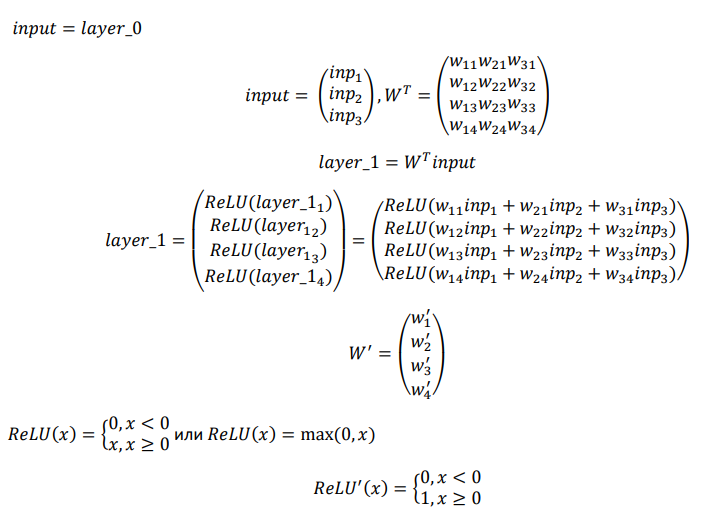

Обратный проход.
1. Коррекция весов W'. Та же процедура, что вы реализовывали ранее:



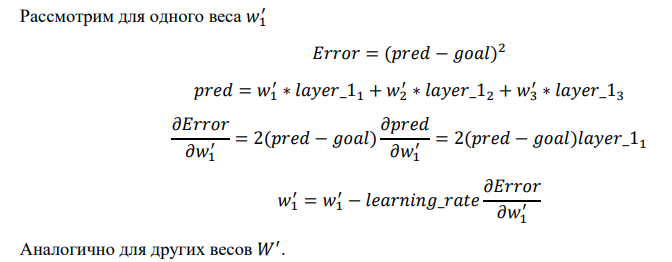

2.	Коррекция весов W:

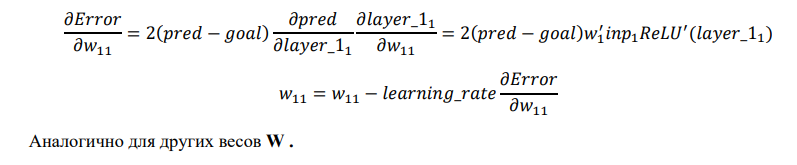

1. Добавьте нелинейность на скрытом слое и реализуйте обучение сети на полном наборе данных. Постройте график функции потерь в процессе обучения.

In [ ]:
import numpy as np
# Обратное распространение для 1 точки
np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями

error_hist = []
pred_hist = []

def relu(x):
  if(x<0):
    return 0
  else:
    return x

def relu_der(x):
  if(x<0):
    return 0
  else:
    return 1

input = lights[0] # [1,0,1]
goal_prediction = walk_stop[0] #  0 - стоять, 1 - идти

n=20

for iteration in range(n):
    layer1 = input.dot(weights_0_1)
    for i in range(2):
      layer1[i] = relu(layer1[i])
    prediction = layer1.dot(weights_1_2)
    error = (prediction - goal_prediction) ** 2
    pred_hist.append(prediction)
    error_hist.append(error)

    # weight corrections for outer layer
    weight_corrections_1_2 = 2* (prediction - goal_prediction) * layer1 # shape (4)
    weight_corrections_1_2 = np.expand_dims(weight_corrections_1_2, axis=1) # shape (4,1)

    # weight corrections for hidden layer
    weight_corrections_0_1 = 2* (prediction - goal_prediction)*weights_1_2*input*relu_der(layer1[0])

    weights_0_1 = weights_0_1 - learning_rate*weight_corrections_0_1.T
    weights_1_2 = weights_1_2 - learning_rate*weight_corrections_1_2

    print("\nError:" + str(error) + " Prediction:" + str(prediction))


Error:[2.15541309] Prediction:[-0.46813252]

Error:[0.54672198] Prediction:[0.2605935]

Error:[0.20284486] Prediction:[0.54961699]

Error:[0.01674614] Prediction:[0.87059312]

Error:[1.26458315e-05] Prediction:[1.0035561]

Error:[2.47168748e-07] Prediction:[0.99950284]

Error:[4.6081955e-09] Prediction:[1.00006788]

Error:[8.64888982e-11] Prediction:[0.9999907]

Error:[1.62179299e-12] Prediction:[1.00000127]

Error:[3.04147685e-14] Prediction:[0.99999983]

Error:[5.70382523e-16] Prediction:[1.00000002]

Error:[1.06966785e-17] Prediction:[1.]

Error:[2.00600432e-19] Prediction:[1.]

Error:[3.76196089e-21] Prediction:[1.]

Error:[7.05516559e-23] Prediction:[1.]

Error:[1.3234503e-24] Prediction:[1.]

Error:[2.48540489e-26] Prediction:[1.]

Error:[4.68694311e-28] Prediction:[1.]

Error:[8.33234331e-30] Prediction:[1.]

Error:[1.97215226e-31] Prediction:[1.]


Text(0, 0.5, 'error')

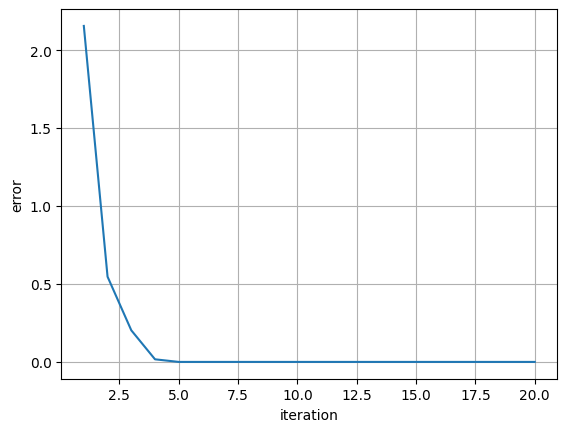

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(1, n, n)
y = np.array(error_hist)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('error')

Text(0, 0.5, 'prediction')

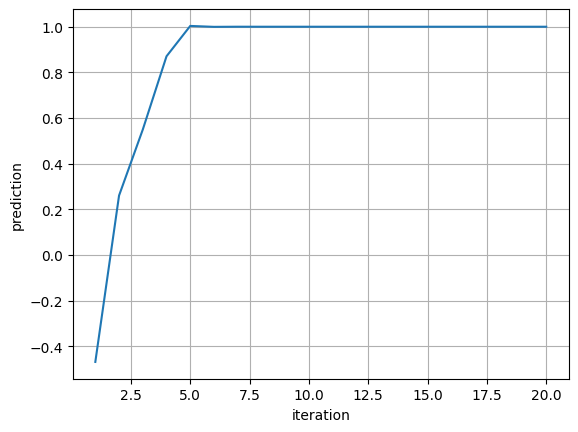

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(1, n, n)
y = np.array(pred_hist)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('prediction')

2. Выберите другую функцию активации и запустите обучение.

In [ ]:
import numpy as np
# Обратное распространение для 1 точки
np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями

error_hist = []
pred_hist = []

def Leakyrelu(x):
  if(x<0):
    return 0.01*x
  else:
    return x

def Leakyrelu_der(x):
  if(x<0):
    return 0.01
  else:
    return 1

input = lights[0] # [1,0,1]
goal_prediction = walk_stop[0] #  0 - стоять, 1 - идти

n = 20

for iteration in range(n):
    layer1 = input.dot(weights_0_1)
    for i in range(2):
      layer1[i] = Leakyrelu(layer1[i])
    prediction = layer1.dot(weights_1_2)
    error = (prediction - goal_prediction) ** 2
    pred_hist.append(prediction)
    error_hist.append(error)

    # weight corrections for outer layer
    weight_corrections_1_2 = 2* (prediction - goal_prediction) * layer1 # shape (4)
    weight_corrections_1_2 = np.expand_dims(weight_corrections_1_2, axis=1) # shape (4,1)

    # weight corrections for hidden layer
    weight_corrections_0_1 = 2* (prediction - goal_prediction)*weights_1_2*input*Leakyrelu_der(layer1[0])

    weights_0_1 = weights_0_1 - learning_rate*weight_corrections_0_1.T
    weights_1_2 = weights_1_2 - learning_rate*weight_corrections_1_2

    print("\nError:" + str(error) + " Prediction:" + str(prediction))


Error:[2.15722213] Prediction:[-0.46874849]

Error:[0.36603342] Prediction:[0.39499304]

Error:[0.06263983] Prediction:[0.74972049]

Error:[0.0105347] Prediction:[0.89736133]

Error:[0.00175262] Prediction:[0.95813569]

Error:[0.0002901] Prediction:[0.98296762]

Error:[4.79147513e-05] Prediction:[0.99307795]

Error:[7.906706e-06] Prediction:[0.99718811]

Error:[1.30425153e-06] Prediction:[0.99885796]

Error:[2.15110532e-07] Prediction:[0.9995362]

Error:[3.54760599e-08] Prediction:[0.99981165]

Error:[5.85057121e-09] Prediction:[0.99992351]

Error:[9.64843259e-10] Prediction:[0.99996894]

Error:[1.59115864e-10] Prediction:[0.99998739]

Error:[2.62403407e-11] Prediction:[0.99999488]

Error:[4.3273813e-12] Prediction:[0.99999792]

Error:[7.13642555e-13] Prediction:[0.99999916]

Error:[1.17689107e-13] Prediction:[0.99999966]

Error:[1.94084911e-14] Prediction:[0.99999986]

Error:[3.20071697e-15] Prediction:[0.99999994]


Text(0, 0.5, 'error')

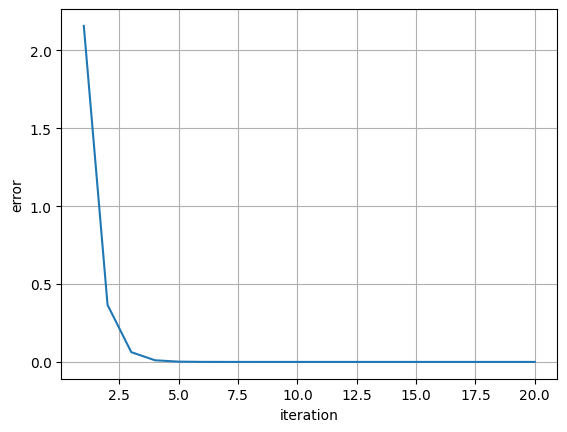

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(1, n, n)
y = np.array(error_hist)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('error')

Text(0, 0.5, 'prediction')

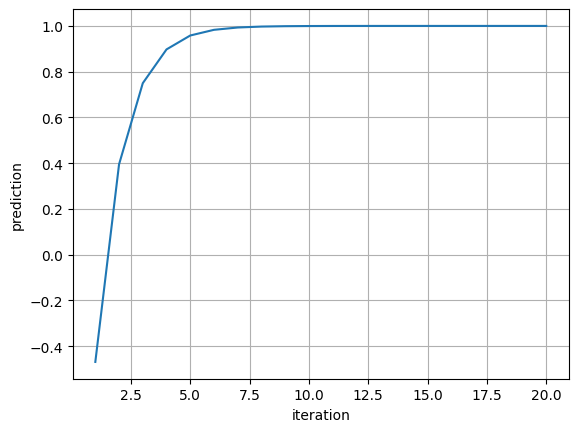

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(1, n, n)
y = np.array(pred_hist)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('prediction')

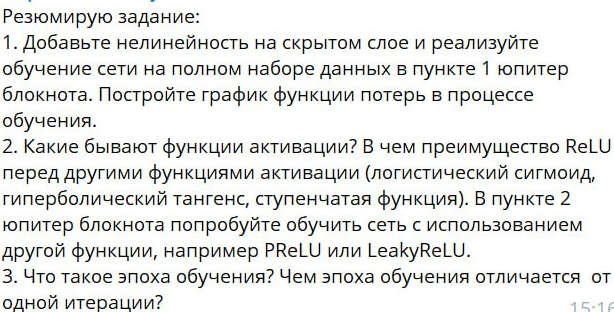

1)Сделано<br>
2.1)4dc1c919e13390d4d65cd17276ad3757.svg<br>
2.2)dcf48c2b6a63d38740767c698ed93541.svg<br>
2.3)f2f3a9890736b93bfd5c27d9b22381e7.svg<br>
2.4)9c5262d9172898e03c848ea21923c799.svg<br>
2.5)c00550424d2832e13c796430dd829f38.svg<br>
2.6)a53ab5145a2a96acb0037670097c75c3.svg<br>
2.6)50724384b6b479e861aaac6551b8c457.svg<br>
2.7.1)Для задач регрессии, используйте ReLU или его модификации, такие как LeakyReLU или ELU. Эти функции обычно дают лучшую производительность в задачах регрессии.<br>
2.7.2)Для моделей глубокого обучения, ReLU является общим выбором для скрытых слоев, так как она может ускорить обучение, но можно также использовать другие функции, например, PReLU или Swish.<br>
3.1)Эпоха - одна итерация в процессе обучения, включающая предъявление всех примеров из обучающего множества и, возможно, проверку качества обучения на контрольном множестве.<br>
3.2)Произошла одна эпоха (epoch) — весь датасет прошел через нейронную сеть в прямом и обратном направлении только один раз.<br>
Итерации — число батчей, необходимых для завершения одной эпохи.<br>
Пример, показывающий разницу: Можно разделить полный датасет из 2000 объектов на батчи размером 500 объектов. Таким образом, для завершения одной эпохи потребуется 4 итерации.

